In [28]:
import pandas as pd
import numpy as np 
import pandas as pd 
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install mapclassify
!pip install pysal==2.0.0



import folium
from folium import plugins
import ipywidgets
import geocoder

from vega_datasets import data as vds
from branca.element import Figure


# ¿Cuáles son los 10 Países con la mayor densidad de población?

In [2]:
poblacion=pd.read_csv('population_by_country_2020.csv')

In [3]:
len(poblacion)

235

In [4]:
poblacion.sort_values(by=['Density (P/Km²)'], ascending= False).head(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
213,Monaco,39290,0.71 %,278,26337,1,NaN,N.A.,N.A.,N.A.,0.00 %
166,Macao,650846,1.39 %,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
113,Singapore,5858322,0.79 %,46005,8358,700,27028.0,1.2,42,N.A.,0.08 %
103,Hong Kong,7507523,0.82 %,60827,7140,1050,29308.0,1.3,45,N.A.,0.10 %
218,Gibraltar,33689,-0.03 %,-10,3369,10,NaN,N.A.,N.A.,N.A.,0.00 %
151,Bahrain,1711057,3.68 %,60403,2239,760,47800.0,2.0,32,89 %,0.02 %
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %
172,Maldives,542151,1.81 %,9591,1802,300,11370.0,1.9,30,35 %,0.01 %
173,Malta,441750,0.27 %,1171,1380,320,900.0,1.5,43,93 %,0.01 %
7,Bangladesh,164972348,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %


# ¿Qué países son los más ricos del año 2020?(GDP más alto)

In [5]:
gdp= pd.read_csv('gdp_1960_2020.csv')

In [6]:
gdp2=gdp.drop(['gdp_percent','rank'],axis=1)
is_10=gdp2[gdp['year']==2020].head(10)

In [7]:
is_country=is_10['country']
is_gdp=is_10['gdp']


Cuanto invierten esos países en gasto militar

In [8]:
x_values= ['US','China','Germany','United Kingdom','India','France','Italy','Canada','South Korea','Russia']
y_values=[778397.2,5286.2,53211.0,60675.0,72937.1,52747.1,28921.3,23281.3,45524.0,61712.5]
isa=is_gdp/100

In [9]:
militar = pd.DataFrame({'Country': x_values, 'Militar_expenditure': y_values, 'GDP':isa})
militar


,Country,Militar_expenditure,GDP
9959,US,778397.2,2.093660e+11
9960,China,5286.2,1.472273e+11
9961,Germany,53211.0,3.806060e+10
9962,United Kingdom,60675.0,2.707744e+10
9963,India,72937.1,2.622984e+10
9964,France,52747.1,2.603004e+10
9965,Italy,28921.3,1.886445e+10
9966,Canada,23281.3,1.643408e+10
9967,South Korea,45524.0,1.630525e+10
9968,Russia,61712.5,1.483498e+10


<AxesSubplot:xlabel='Country'>

<Figure size 1080x360 with 0 Axes>

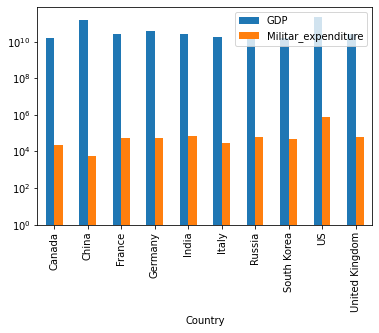

In [10]:
fig2=plt.figure(figsize=(15,5))
is_item=militar.pivot_table(index=['Country'],values=['Militar_expenditure','GDP'])
#is_item.title("Ejemplo de título")
is_item.plot.bar(log=1)

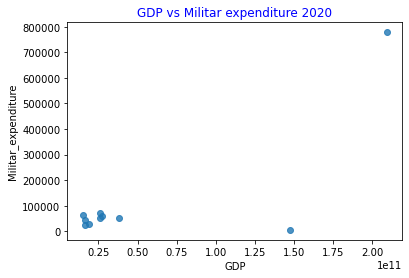

In [11]:
plt.scatter(x=militar['GDP'], y=militar['Militar_expenditure'], alpha= 0.8)
plt.xlabel('GDP')
plt.ylabel('Militar_expenditure')
plt.title('GDP vs Militar expenditure 2020',color='b')
plt.show()

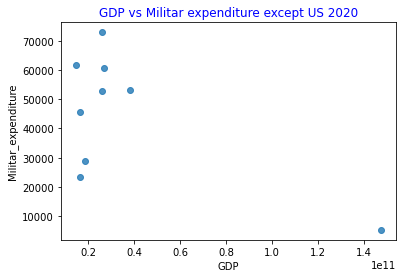

In [12]:
x_all=militar[militar['Country']!='US']
plt.scatter(x=x_all['GDP'], y=x_all['Militar_expenditure'], alpha= 0.8)
plt.xlabel('GDP')
plt.ylabel('Militar_expenditure')
plt.title('GDP vs Militar expenditure except US 2020',color='b')
plt.show()

In [13]:
#¿Qué país es el que invierte menos con relacion a su GDP?
x_all.sort_values(by=['GDP'],ascending=False)

,Country,Militar_expenditure,GDP
9960,China,5286.2,1.472273e+11
9961,Germany,53211.0,3.806060e+10
9962,United Kingdom,60675.0,2.707744e+10
9963,India,72937.1,2.622984e+10
9964,France,52747.1,2.603004e+10
9965,Italy,28921.3,1.886445e+10
9966,Canada,23281.3,1.643408e+10
9967,South Korea,45524.0,1.630525e+10
9968,Russia,61712.5,1.483498e+10


# Coeficiente de desigualdad a tráves del tiempo 


In [14]:
world_data = gpd.read_file('world-data.geojson', driver='geojson', crs=4326)
# Updates to names so merge finds as many countries as possible
world_data['name'] = np.where(world_data['name'].str.contains('United States'), 'United States', world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains('Dem. Rep. Congo'), 'Congo, Dem. Rep.', world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains('Congo'), 'Congo, Rep.', world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Côte d'Ivoire"), "Cote d'Ivoire", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("eSwatini"), "Swaziland", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Slovakia"), "Slovak Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Bosnia and Herz."), "Bosnia and Herzegovina", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Laos"), "Lao", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Central African Rep."), "Central African Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Czechia"), "Czech Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Kyrgyzstan"), "Kyrgyz Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Macedonia"), "North Macedonia", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("S. Sudan"), "South Sudan", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Eq. Guinea"), "Equatorial Guinea", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Dominican Rep."), "Dominican Republic", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("Solomon Is."), "Solomon Islands", world_data['name'])
world_data['name'] = np.where(world_data['name'].str.contains("N. Cyprus"), "Cyprus", world_data['name'])

In [15]:
gini_data = pd.read_csv('gini.csv')
gini_data = gini_data.melt(id_vars=['country'], var_name='year', value_name='gini')

In [16]:
gini_world_data = world_data.merge(gini_data, left_on='name', right_on='country', how='left')

In [206]:
#gini_world_data.query('year' == "2002").head()

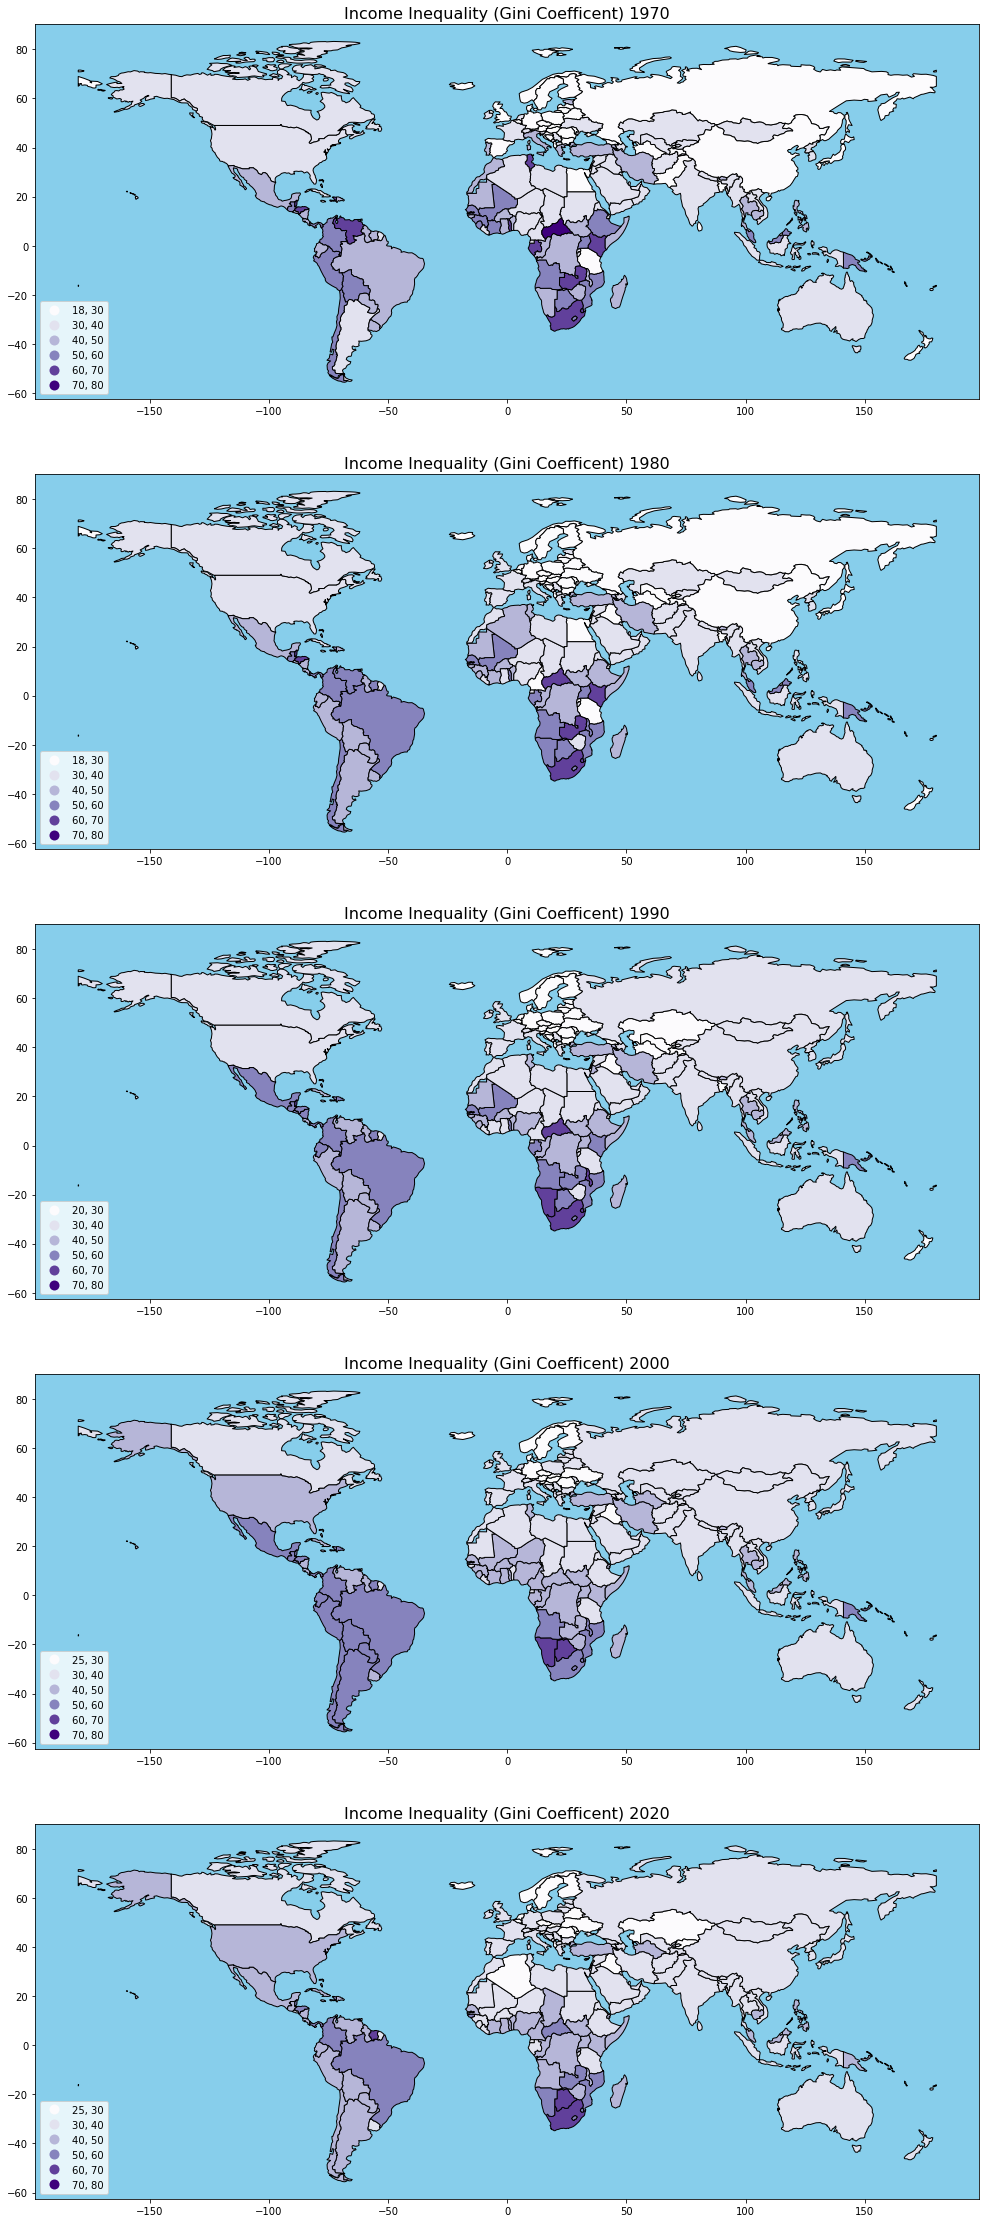

In [17]:
years = [1970, 1980, 1990, 2000, 2020]
classifications = dict(bins=[30,40,50,60,70,80])

fig, axs = plt.subplots(len(years), 1, figsize=(20, 8*len(years)))

for ndx, yr in enumerate(years):
    ax1 = axs[ndx]
    ax1.set_facecolor('skyblue')
    ax1.set_title(f'Income Inequality (Gini Coefficent) {yr}', fontsize=16)
    gini_world_data.query(f'year == "{yr}"').plot(
        ax=ax1,
        column='gini',
        edgecolor='black',
        categorical=False,
        scheme='User_Defined',
        classification_kwds=classifications,
        #k=6,
        #scheme='fisher_jenks',
        cmap='Purples',
        legend=True,
        legend_kwds={'loc': 'lower left', 'fmt': '{:,.0f}'}
        #,
        #missing_kwds={'color':'red','edgecolor': 'brwon', 'hatch': '///', 'label': 'Missing values'}
    )
plt.show()

# Top 100 personas más ricas en el mundo

In [18]:
rich= pd.read_csv('TopRichestInWorld.csv')
ric_unique=rich['Country/Territory'].unique()

In [19]:
rich[rich['Country/Territory']=='Mexico']

,Name,NetWorth,Age,Country/Territory,Source,Industry
12,Carlos Slim Helu & family,"$81,200,000,000",82,Mexico,telecom,Telecom
44,German Larrea Mota Velasco & family,"$30,800,000,000",68,Mexico,mining,Metals & Mining


In [21]:
#import geocoder
locations=[]
for i in ric_unique:
    country=geocoder.osm(f"{i}")
    lat=country.lat
    lng=country.lng
    locations.append((i,lat,lng))


In [22]:
richy=pd.DataFrame(locations)


In [23]:
gk = rich.groupby('Country/Territory').count()['Name']

In [24]:
z_values=[37,7,7,2,8,2,1,7,4,2,2,1,3,2,1,1,2,1,1]
richy['Number'] = pd.DataFrame({'Number':z_values})


In [25]:
mapa=folium.Map(location=[31,-89],zoom_start=6)

for indice,fila in richy[:100].iterrows():
  folium.Marker(
      location=[fila.loc[1],fila.loc[2]],
      popup="<a href=https://es.wikipedia.org/wiki/Dumas_(Texas)> Dumas</a>",
      tooltip=f"{fila.loc[0],fila['Number']}"
  ,icon=folium.Icon(color = 'gray')).add_to(mapa)

mapa

# Distrubución de la riqueza

In [26]:
todo= pd.read_csv('combined_final_last_10_years.csv')
todo2=todo[todo['year']==2016].fillna(0)
todo2

,continent,country,year,demox_eiu,income_per_person,invest_%_gdp,tax_%_gdp,gini_index
28,Africa,Angola,2016,34.0,6260,8.4,10.3,42.6
47,Africa,Botswana,2016,78.7,16000,24.3,20.8,60.5
58,Africa,Burkina Faso,2016,47.0,1640,23.2,15.8,35.3
81,Africa,Cote d'Ivoire,2016,38.1,3400,20.7,15.2,41.5
117,Africa,Kenya,2016,53.3,2890,17.3,15.8,41.1
...,...,...,...,...,...,...,...,...
1189,Europe,Turkey,2016,50.4,23700,28.2,18.3,41.9
1200,Europe,Ukraine,2016,57.0,7680,21.5,19.6,24.9
1211,Europe,United Kingdom,2016,83.6,39400,17.0,25.6,33.4
1222,Oceania,Australia,2016,90.1,44600,25.3,22.3,32.3


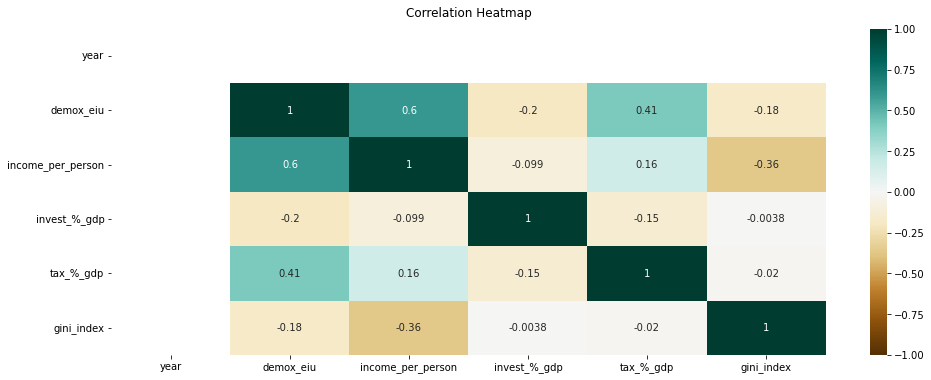

In [29]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(todo2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', pad=12);

¿La cantidad del % de impuestos cobrados se asocia al valor  índice Gini? 

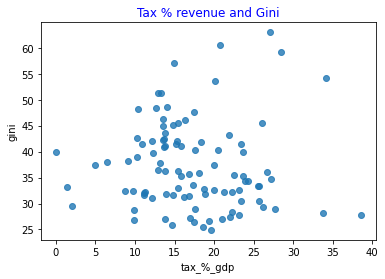

In [30]:
plt.scatter(x=todo2['tax_%_gdp'], y=todo2['gini_index'], alpha= 0.8)
plt.xlabel('tax_%_gdp')
plt.ylabel('gini')
plt.title('Tax % revenue and Gini',color='b')
plt.show()

¿Un alto índice de democracia se asocia al índice Gini ?

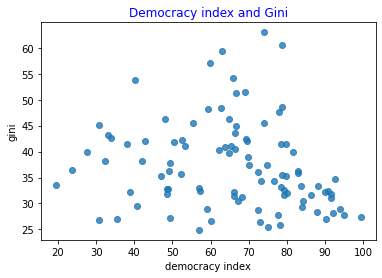

In [31]:
plt.scatter(x=todo2['demox_eiu'], y=todo2['gini_index'], alpha= 0.8)
plt.xlabel('democracy index')
plt.ylabel('gini')
plt.title('Democracy index and Gini',color='b')
plt.show()

¿Un alto PIB per capita se asocia a un alto valor de índice Gini ?

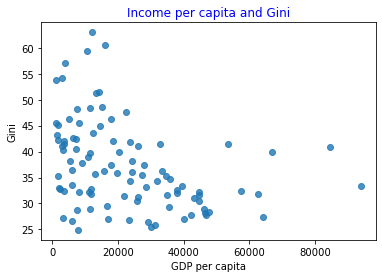

In [32]:
plt.scatter(x=todo2['income_per_person'], y=todo2['gini_index'], alpha= 0.8)
plt.xlabel('GDP per capita')
plt.ylabel('Gini')
plt.title('Income per capita and Gini',color='b')
plt.show()

Un porcentaje alto de inversión se asocia a un alto índice Gini?

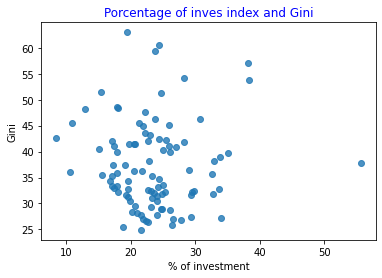

In [33]:
plt.scatter(x=todo2['invest_%_gdp'], y=todo2['gini_index'], alpha= 0.8)
plt.xlabel('% of investment')
plt.ylabel('Gini')
plt.title('Porcentage of inves index and Gini',color='b')
plt.show()

# ¡Seguiremos investigando! 🥸

Boxplot para el año 2016

In [34]:
xx=todo2.iloc[:,5:]

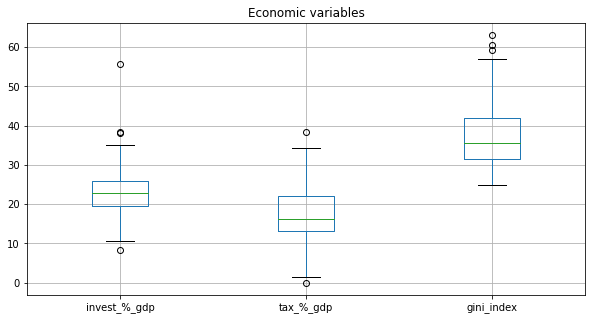

In [35]:
fig2=plt.figure(figsize=(10,5))

xx.boxplot(column=['invest_%_gdp','tax_%_gdp','gini_index'])
plt.title("Economic variables")

plt.grid(True)

# Predicciones en base a las series históricas 

In [36]:
incom_capita=pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
incom_mex=incom_capita[incom_capita['country']=='Mexico']
incom_canada= incom_capita[incom_capita['country']=='Canada']
incom_us= incom_capita[incom_capita['country']=='United States']

In [37]:
lista=[]
for i in incom_mex[1:]:
    lista.append(i) 

    
lista2=[]
for i in incom_mex.iloc[0,1:]: 
    lista2.append(i)

In [38]:
lista3=[]
for i in incom_canada[1:]:
    lista3.append(i) 

    
lista4=[]
for i in incom_canada.iloc[0,1:]: 
    lista4.append(i)
#incom_mex.iloc[0,1:]

In [39]:
lista5=[]
for i in incom_us[1:]:
    lista5.append(i) 

    
lista6=[]
for i in incom_us.iloc[0,1:]: 
    lista6.append(i)

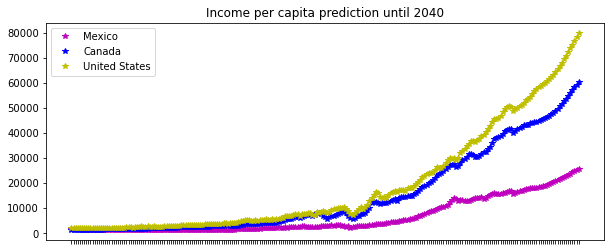

In [40]:

fig2=plt.figure(figsize=(10,4))

plt.plot(lista[1:],lista2,'*',c='m',label='Mexico')
plt.plot(lista3[1:],lista4,'*',c='b',label='Canada')
plt.plot(lista5[1:],lista6,'*',c='y',label='United States')
plt.title('Income per capita prediction until 2040')
plt.xticks(visible = False)

plt.legend()
plt.show()



# México en el rank mundial de gdp 1960-2020

In [41]:
gdp=pd.read_csv('gdp_1960_2020.csv')


In [42]:
mex=gdp[gdp['country']=='Mexico']
canada=gdp[gdp['country']=='Canada']
usa=gdp[gdp['country']=='the United States']

In [43]:
#Rank que ha ocupado México en el mundo (mayor a menor)
mex['rank'].unique()

array([13, 12, 14, 15, 16, 10,  8, 11, 17, 18,  9])

In [44]:
mex[mex['year']==2020]

,year,rank,country,state,gdp,gdp_percent
9972,2020,14,Mexico,America,1076163316174,0.013879


In [45]:
mex[mex['rank']==14]

,year,rank,country,state,gdp,gdp_percent
219,1962,14,Mexico,America,15200000000,0.011511
324,1963,14,Mexico,America,16960000000,0.011926
429,1964,14,Mexico,America,20080000000,0.012890
648,1966,14,Mexico,America,24320000000,0.013138
1001,1969,14,Mexico,America,32480000000,0.013761
1771,1975,14,Mexico,America,88000000000,0.015652
2313,1979,14,Mexico,America,134561403508,0.014221
2902,1983,14,Mexico,America,156159198584,0.014046
7316,2007,14,Mexico,America,1052696282278,0.018287
9972,2020,14,Mexico,America,1076163316174,0.013879


In [46]:
mex[mex['rank']==8]

,year,rank,country,state,gdp,gdp_percent
2593,1981,8,Mexico,America,263959336734,0.024074
6099,2001,8,Mexico,America,756706300589,0.022866
6298,2002,8,Mexico,America,772106378935,0.022468


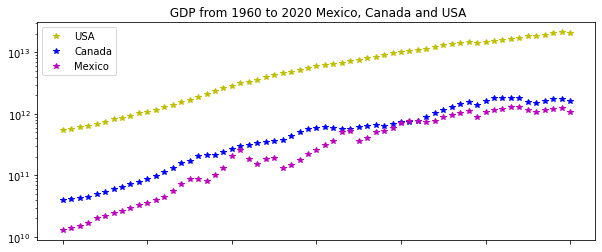

In [47]:
fig2=plt.figure(figsize=(10,4))

is_year=mex['year']
is_gdp=mex['gdp']

is_cany=canada['year']
is_cangdp=canada['gdp']

is_usay=usa['year']
is_gdpusa=usa['gdp']

plt.plot(is_usay,is_gdpusa,'*',c='y',label='USA')
plt.plot(is_cany,is_cangdp,'*',c='b',label='Canada')
plt.plot(is_year,is_gdp,'*',c='m',label='Mexico')
plt.title(' GDP from 1960 to 2020 Mexico, Canada and USA')
plt.xticks(visible = False)
plt.yscale('log')

plt.legend()
plt.show()
